<a href="https://colab.research.google.com/github/Saivkumar/SaivKumar/blob/main/TSNE_Cosmetics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Essential Libraries for TSNE

In [1]:
%%capture
!pip install bioinfokit

In [2]:
from pandas import read_csv
import pandas as pd

from sklearn.manifold import TSNE
from bioinfokit.visuz import cluster

Loading Dataset

In [14]:
filename = '/content/Cosmetics Dataset.zip'
df = pd.read_csv(filename)

In [15]:
df

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1467,Sun protect,KORRES,Yoghurt Nourishing Fluid Veil Face Sunscreen B...,35,3.9,"Water, Alcohol Denat., Potassium Cetyl Phospha...",1,1,1,1,1
1468,Sun protect,KATE SOMERVILLE,Daily Deflector™ Waterlight Broad Spectrum SPF...,48,3.6,"Water, Isododecane, Dimethicone, Butyloctyl Sa...",0,0,0,0,0
1469,Sun protect,VITA LIBERATA,Self Tan Dry Oil SPF 50,54,3.5,"Water, Dihydroxyacetone, Glycerin, Sclerocarya...",0,0,0,0,0
1470,Sun protect,ST. TROPEZ TANNING ESSENTIALS,Pro Light Self Tan Bronzing Mist,20,1.0,"Water, Dihydroxyacetone, Propylene Glycol, PPG...",0,0,0,0,0


The Above Dataset is about various skincare products or cosmetics and we can annalyze.
Price Analysis: Determine the price range for different brands or products targeting specific skin types.
Ingredient Analysis: Analyze the most common ingredients used in top-ranked products.
Skin Type Suitability: Investigate which skin types have the most products available

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Label        1472 non-null   object 
 1   Brand        1472 non-null   object 
 2   Name         1472 non-null   object 
 3   Price        1472 non-null   int64  
 4   Rank         1472 non-null   float64
 5   Ingredients  1472 non-null   object 
 6   Combination  1472 non-null   int64  
 7   Dry          1472 non-null   int64  
 8   Normal       1472 non-null   int64  
 9   Oily         1472 non-null   int64  
 10  Sensitive    1472 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 126.6+ KB


From Above Info we can see dataset has no Missing Values and Null Values.

Converting Object Columns to Numeric Data through Label Encoding. To Perform TSNE data should be Numeric

Label Encoding for Label,Brand,Name,Ingredients

In [17]:
categorical_columns = ['Label', 'Brand', 'Name', 'Ingredients']

In [20]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [22]:
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])


In [23]:
df

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
0,3,64,335,175,4.1,112,1,1,1,1,1
1,3,95,525,179,4.1,248,1,1,1,1,1
2,3,29,985,68,4.4,764,1,1,1,1,0
3,3,64,1265,175,3.8,111,1,1,1,1,1
4,3,49,1459,38,4.1,1252,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1467,4,62,1452,35,3.9,528,1,1,1,1,1
1468,4,55,349,48,3.6,1089,0,0,0,0,0
1469,4,111,1125,54,3.5,767,0,0,0,0,0
1470,4,100,980,20,1.0,769,0,0,0,0,0


Loading Dataset into an Array

In [25]:
array = df.values
X = array[:, [0, 1, 2, 3, 5, 6, 7, 8, 9, 10]]  # All columns except the 4th one (Rank)
Y = array[:, 4]   # Only the 4th column (Rank)

In [26]:
#TSNE visualization
from bioinfokit.visuz import cluster


model = TSNE(2)
model.fit(X)
#data_tsne = model.transform(X)

data_tsne = TSNE(n_components=2).fit_transform(X)
cluster.tsneplot(score=data_tsne)

In [28]:
color_class = dataframe['Rank'].to_numpy()
cluster.tsneplot(score=data_tsne, colorlist=color_class, legendpos='upper right')

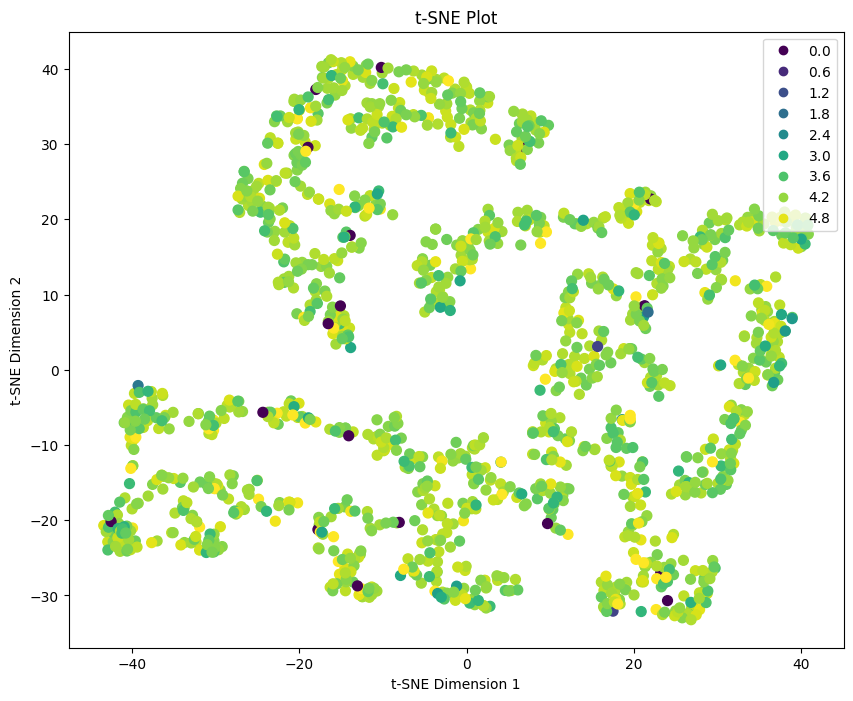

In [31]:
import seaborn as sns  # Assuming you're using seaborn for visualization
import matplotlib.pyplot as plt

def tsneplot(score, colorlist, legendpos='upper right'):
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(score[:, 0], score[:, 1], c=colorlist, cmap='viridis', s=50)
    plt.legend(*scatter.legend_elements(), loc=legendpos)
    plt.xlabel('t-SNE Dimension 1')
    plt.ylabel('t-SNE Dimension 2')
    plt.title('t-SNE Plot')
    plt.show()

tsneplot(score=data_tsne, colorlist=color_class, legendpos='upper right')

In [32]:
data_tsne

array([[-29.251244 , -23.501772 ],
       [-17.638287 , -20.631456 ],
       [ 14.74681  ,   3.1699307],
       ...,
       [ 20.499811 ,   1.6673326],
       [ 15.690959 ,   3.0975304],
       [-24.38127  ,  -5.653111 ]], dtype=float32)